In [12]:
import sys
sys.path.append("./modules")

import numpy as np
import multi_layer_perceptron

from imp import reload
reload(multi_layer_perceptron)


# Logic and
anddata = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]])

p = multi_layer_perceptron.mlp(anddata[:,0:2],anddata[:,2:3],2)
p.mlptrain(anddata[:,0:2],anddata[:,2:3],0.25,1001)
p.confmat(anddata[:,0:2],anddata[:,2:3])

print()

# Logic xor
xordata = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])

p = multi_layer_perceptron.mlp(xordata[:,0:2],xordata[:,2:3],2)
p.mlptrain(xordata[:,0:2],xordata[:,2:3],0.25,1001)
p.confmat(xordata[:,0:2],xordata[:,2:3])

Iteration:  0 	Error:  0.682752047359831
Iteration:  100 	Error:  0.09193711923478254
Iteration:  200 	Error:  0.0072113113434755394
Iteration:  300 	Error:  0.0031838281893788204
Iteration:  400 	Error:  0.0019694472142693627
Iteration:  500 	Error:  0.0014037790747257063
Iteration:  600 	Error:  0.0010817277370730152
Iteration:  700 	Error:  0.0008756015926539961
Iteration:  800 	Error:  0.0007331248124661725
Iteration:  900 	Error:  0.0006291348295990658
Iteration:  1000 	Error:  0.0005500949903193195
Confusion matrix is:
[[3. 0.]
 [0. 1.]]
Percentage Correct:  100.0

Iteration:  0 	Error:  0.516636102252933
Iteration:  100 	Error:  0.4978346376599112
Iteration:  200 	Error:  0.4250005043136922
Iteration:  300 	Error:  0.30333294458077154
Iteration:  400 	Error:  0.060961818205951396
Iteration:  500 	Error:  0.01663309919925514
Iteration:  600 	Error:  0.00930967353440637
Iteration:  700 	Error:  0.00639840605500786
Iteration:  800 	Error:  0.004850537202717497
Iteration:  900 	Erro

(40,) (40,)
(1, 40) (40, 1)


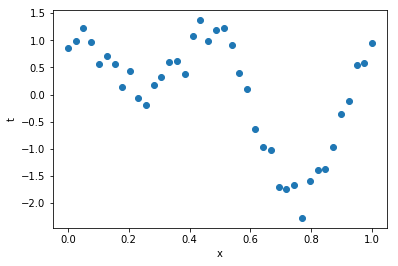

In [8]:
"""
A Regression Problem （1）: data
"""
import pylab as pl
import multi_layer_perceptron

# A simple math function
x = np.ones((1, 40)) * np.linspace(0, 1, 40)
t = np.sin(2 * np.pi * x) + np.cos(4 * np.pi * x) + np.random.randn(40) * 0.2

x = x.T
t = t.T

# reshape() method
v1 = np.linspace(0,1,40)
print(np.shape(v1), np.shape(v1.T))

v2 = np.linspace(0,1,40).reshape((1, 40))
print(np.shape(v2), np.shape(v2.T))

# split the data in the ratio 50:25:25 for train, valid, and test respectively
train = x[0::2,:]
test = x[1::4,:]
valid = x[3::4,:]
traintarget = t[0::2,:]
testtarget = t[1::4,:]
validtarget = t[3::4,:]

# Plot the data
pl.plot(x,t,'o')
pl.xlabel('x')
pl.ylabel('t')
pl.show()

In [9]:
"""
A Regression Problem （2）: build a neural network
"""

# Perform basic training with a small MLP
net1 = multi_layer_perceptron.mlp(train, traintarget, 3, outtype='linear')
net1.mlptrain(train, traintarget, 0.25, 101)

# Use early stop
net2 = multi_layer_perceptron.mlp(train, traintarget, 3, outtype='linear')
net2.earlystopping(train,traintarget,valid,validtarget,0.25)

# test
test = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)
outputs = net2.mlpfwd(test)
print(0.5 * sum((outputs - testtarget) ** 2))

Iteration:  0 	Error:  10.84025716356065
Iteration:  100 	Error:  6.462723151466901
1
Iteration:  0 	Error:  11.073235711865996
2
Iteration:  0 	Error:  6.43697709103077
3
Iteration:  0 	Error:  6.381370732523477
4
Iteration:  0 	Error:  6.287382537978925
5
Iteration:  0 	Error:  6.140037149014275
6
Iteration:  0 	Error:  5.941390570855158
7
Iteration:  0 	Error:  5.70035415453047
8
Iteration:  0 	Error:  5.413945645151532
9
Iteration:  0 	Error:  5.060382344596163
10
Iteration:  0 	Error:  4.60151317053681
11
Iteration:  0 	Error:  3.8510269375049226
12
Iteration:  0 	Error:  2.595097216700369
13
Iteration:  0 	Error:  1.600021894239244
14
Iteration:  0 	Error:  1.2213463375753957
15
Iteration:  0 	Error:  1.1118938518881327
16
Iteration:  0 	Error:  1.0747738605898844
17
Iteration:  0 	Error:  1.0566312142341059
18
Iteration:  0 	Error:  1.0455885728772734
19
Iteration:  0 	Error:  1.0383756822210144
20
Iteration:  0 	Error:  1.0334944240119734
21
Iteration:  0 	Error:  1.03008577189

In [10]:
"""
A Regression Problem （3）
"""

# Test out different sizes of network
count = 0
out = np.zeros((10,7))
for nnodes in [1,2,3,5,10,25,50]:
    for i in range(10):
        net = multi_layer_perceptron.mlp(train,traintarget,nnodes,outtype='linear')
    out[i,count] = net.earlystopping(train,traintarget,valid,validtarget,0.25)
    count += 1

print(out)
print(out.mean(axis=0))
print(out.var(axis=0))
print(out.max(axis=0))
print(out.min(axis=0))


1
Iteration:  0 	Error:  16.314069805861983
2
Iteration:  0 	Error:  6.349221165874969
3
Iteration:  0 	Error:  6.246787282777573
4
Iteration:  0 	Error:  6.0998982084554685
5
Iteration:  0 	Error:  5.913765349152502
6
Iteration:  0 	Error:  5.70764995110333
7
Iteration:  0 	Error:  5.500937246132116
8
Iteration:  0 	Error:  5.3084209423492155
9
Iteration:  0 	Error:  5.137896928527568
10
Iteration:  0 	Error:  4.991182198463731
11
Iteration:  0 	Error:  4.866649910514855
12
Iteration:  0 	Error:  4.761320003902743
13
Iteration:  0 	Error:  4.672027333505308
14
Iteration:  0 	Error:  4.595919443956479
15
Iteration:  0 	Error:  4.530600633892432
16
Iteration:  0 	Error:  4.474122884537763
17
Iteration:  0 	Error:  4.424923919745954
18
Iteration:  0 	Error:  4.381755827122933
19
Iteration:  0 	Error:  4.343620432211491
20
Iteration:  0 	Error:  4.309715847325086
21
Iteration:  0 	Error:  4.279394036145712
22
Iteration:  0 	Error:  4.252127756651911
23
Iteration:  0 	Error:  4.22748500748

89
Iteration:  0 	Error:  0.8521614810598719
90
Iteration:  0 	Error:  0.8477464162343732
91
Iteration:  0 	Error:  0.8430823053033726
92
Iteration:  0 	Error:  0.8381293884449811
93
Iteration:  0 	Error:  0.8328402670065497
94
Iteration:  0 	Error:  0.8271579623028823
95
Iteration:  0 	Error:  0.8210134197834537
96
Iteration:  0 	Error:  0.8143222950168347
97
Iteration:  0 	Error:  0.8069808189491813
98
Iteration:  0 	Error:  0.7988605066742448
99
Iteration:  0 	Error:  0.7898014707020282
100
Iteration:  0 	Error:  0.7796041837985773
101
Iteration:  0 	Error:  0.7680198360789925
102
Iteration:  0 	Error:  0.7547402195569117
103
Iteration:  0 	Error:  0.739389903226286
104
Iteration:  0 	Error:  0.7215273562285139
105
Iteration:  0 	Error:  0.7006692114463876
106
Iteration:  0 	Error:  0.676364313557063
107
Iteration:  0 	Error:  0.6483581163409741
108
Iteration:  0 	Error:  0.6168821939141527
109
Iteration:  0 	Error:  0.583021078217968
110
Iteration:  0 	Error:  0.5488936183366165
11

In [7]:
"""
A Classification Problem （1）: preprocess & load data
"""
import numpy as np

# The class in the file (which is the last column) is text rather than a number,
def preprocessIris(infile, outfile):
    stext1 = 'Iris-setosa'
    stext2 = 'Iris-versicolor'
    stext3 = 'Iris-virginica'
    rtext1 = '0'
    rtext2 = '1'
    rtext3 = '2'
    
    fid = open(infile,"r")
    oid = open(outfile,"w")

    for s in fid:
        if s.find(stext1) > -1:
            oid.write(s.replace(stext1, rtext1))
        elif s.find(stext2) > -1:
            oid.write(s.replace(stext2, rtext2))
        elif s.find(stext3) > -1:
            oid.write(s.replace(stext3, rtext3))
    fid.close()
    oid.close()


# preprocess
preprocessIris('./data/iris.data','./data/iris_proc.data')

# load
iris = np.loadtxt('./data/iris_proc.data',delimiter=',')

# normalising
iris[:,:4] = iris[:,:4] - iris[:,:4].mean(axis=0)
imax = np.concatenate((iris.max(axis=0)*np.ones((1,5)),np.abs(iris.min(axis=0)*np.ones((1,5)))),axis=0).max(axis=0)
iris[:,:4] = iris[:,:4]/imax[:4]

# print a few datapoints
print(iris[0:5,:])

[[-0.36142626  0.33135215 -0.7508489  -0.76741803  0.        ]
 [-0.45867099 -0.04011887 -0.7508489  -0.76741803  0.        ]
 [-0.55591572  0.10846954 -0.78268251 -0.76741803  0.        ]
 [-0.60453809  0.03417533 -0.71901528 -0.76741803  0.        ]
 [-0.41004862  0.40564636 -0.7508489  -0.76741803  0.        ]]


In [13]:
"""
A Classification Problem （2）: train
"""
import multi_layer_perceptron

# Convert the class 1, 2 and 3 into 1-of-N encoding
target = np.zeros((np.shape(iris)[0],3))
indices = np.where(iris[:,4]==0)
target[indices,0] = 1
indices = np.where(iris[:,4]==1)
target[indices,1] = 1
indices = np.where(iris[:,4]==2)
target[indices,2] = 1

# randomly order the data
order = list(range(np.shape(iris)[0]))
np.random.shuffle(order)
iris = iris[order,:]
target = target[order, :]

# split half of data to train, one quarter for valid, and one quarter for test
train = iris[::2,0:4]
traint = target[::2]
valid = iris[1::4,0:4]
validt = target[1::4]
test = iris[3::4,0:4]
testt = target[3::4]

# train the network
net = multi_layer_perceptron.mlp(train,traint,5,outtype='softmax')
net.earlystopping(train,traint,valid,validt,0.1)
net.confmat(test,testt)

1
Iteration:  0 	Error:  26.660735757097527
2
Iteration:  0 	Error:  17.34294050250026
3
Iteration:  0 	Error:  9.49738968908927
4
Iteration:  0 	Error:  6.533153756568857
5
Iteration:  0 	Error:  4.826757657332623
6
Iteration:  0 	Error:  3.8015007386287927
7
Iteration:  0 	Error:  3.150293379133937
8
Iteration:  0 	Error:  2.710596121858646
9
Iteration:  0 	Error:  2.3972555033906104
10
Iteration:  0 	Error:  2.163807151439637
11
Iteration:  0 	Error:  1.9834254362230022
12
Iteration:  0 	Error:  1.8397559295069816
13
Iteration:  0 	Error:  1.7223495269862195
14
Iteration:  0 	Error:  1.6242657577623918
15
Iteration:  0 	Error:  1.5407443407686376
16
Iteration:  0 	Error:  1.4684312709276637
17
Iteration:  0 	Error:  1.4049081645878845
18
Iteration:  0 	Error:  1.348395511902035
19
Iteration:  0 	Error:  1.2975598683290925
20
Iteration:  0 	Error:  1.2513853903023344
21
Iteration:  0 	Error:  1.2090863976659274
22
Iteration:  0 	Error:  1.1700467511942247
23
Iteration:  0 	Error:  1.

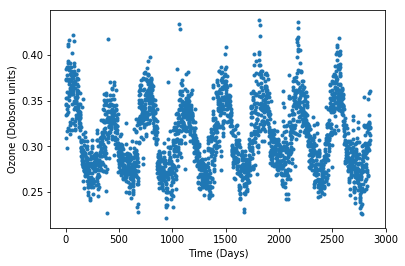

In [29]:
"""
Time-series Prediction (1): Load data

It is a common data analysis task, where we have a set of data that show how something varies over time, and we want to predict how the data
will vary in the future. 
"""
import pylab as pl

PNoz = np.loadtxt('./data/PNoz.data')

pl.ion()
pl.plot(np.arange(np.shape(PNoz)[0]),PNoz[:,2],'.')
pl.xlabel('Time (Days)')
pl.ylabel('Ozone (Dobson units)')
pl.show()

In [38]:
"""
Time-series Prediction (2): preprocess data & train
"""

# Normalise data
PNoz[:,2] = PNoz[:,2] - PNoz[:,2].mean()
PNoz[:,2] = PNoz[:,2] / PNoz[:,2].max()

# Assemble input vectors
t = 2
k = 3

# Assembling the input vector from the time-series data
lastPoint = np.shape(PNoz)[0] - t * (k + 1)
inputs = np.zeros((lastPoint,k))
targets = np.zeros((lastPoint,1))
for i in range(lastPoint):
    inputs[i,:] = PNoz[i:i+t*k:t,2]
    targets[i] = PNoz[i+t*(k+1),2]

# Randomly order the data
change = list(range(np.shape(inputs)[0]))
np.random.shuffle(change)
inputs = inputs[change,:]
targets = targets[change,:]

# split train dev test (It is also common to use thedatapoints near the end as part of the test set)
test = inputs[-800:,:]
testtargets = targets[-800:,:]
train = inputs[0:-800:2,:]
traintargets = targets[0:-800:2]
valid = inputs[1:-800:2,:]
validtargets = targets[1:-800:2]

# train
net = multi_layer_perceptron.mlp(train,traintargets,3,outtype='linear')
net.earlystopping(train,traintargets,valid,validtargets,0.25)

# test
test = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)
testout = net.mlpfwd(test)
print(0.5*np.sum((testtargets-testout)**2))

1
Iteration:  0 	Error:  158.68201140817888
2
Iteration:  0 	Error:  16.701351881810737
3
Iteration:  0 	Error:  16.66447593235052
4
Iteration:  0 	Error:  16.65421544418068
5
Iteration:  0 	Error:  16.646314925882002
6
Iteration:  0 	Error:  16.638619972619626
7
Iteration:  0 	Error:  16.63054165862681
8
Iteration:  0 	Error:  16.621874095044568
9
Iteration:  0 	Error:  16.61250305669907
10
Iteration:  0 	Error:  16.602333675623917
11
Iteration:  0 	Error:  16.59127288805396
12
Iteration:  0 	Error:  16.579226300775378
13
Iteration:  0 	Error:  16.566099485398222
14
Iteration:  0 	Error:  16.5518012369035
15
Iteration:  0 	Error:  16.536248202415308
16
Iteration:  0 	Error:  16.519370689718837
17
Iteration:  0 	Error:  16.50111944514814
18
Iteration:  0 	Error:  16.48147301859415
19
Iteration:  0 	Error:  16.460445100460895
20
Iteration:  0 	Error:  16.438090983988896
21
Iteration:  0 	Error:  16.414512147489745
22
Iteration:  0 	Error:  16.38985794198087
23
Iteration:  0 	Error:  16.

(800, 1) (800, 1)


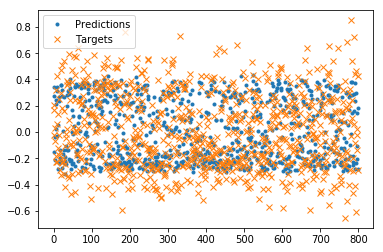

In [39]:
"""
Time-series Prediction (3): plot test
"""
print(np.shape(testout), np.shape(testtargets))

pl.figure()
pl.plot(np.arange(np.shape(test)[0]),testout,'.')
pl.plot(np.arange(np.shape(test)[0]),testtargets,'x')
pl.legend(('Predictions','Targets'))
pl.show()